For the news EDA, I viewed descriptives of the news sentiment across all sectors and conducted some secondary analysis by sector. I also completed my first attempt at ETS decomposition for the Finance sector only. It seems that the news sentiment has no trend or seasonality (at least for the finance sector). In addition, I conducted pca on the sentiment data. However it seems that the most important discoveries from the EDA is that 

(1) the standard deviations of the sentiment scores are very large, 
(2) finance seems to have a more positive sentiment, and 
(3) the principal components analysis explained 97% of the variance using two components. 

In other words, we may not necessarily need all four sentiment scores. I am curious if there is an underlying structure by sector (will investigate this later). One analysis approach could be to include the sentiment features as a baseline predictor. We could see if we could make some improvements to our models by including the pca components instead of the vader sentiment scores computed by vader. I think that there some other opportunties to improve the vader scores as well. 

In [669]:
import numpy as np
import pandas as pd

In [670]:
#Read in csv - Sentiment data from 2019-2024
#news_19_24_df = pd.read_csv("C:\\Users\\ander\Documents\\news\\Erdos-DS-2024-newsworthy\\data\\news_data_2019_2024_complete.csv")
news_19_24_df = pd.read_csv('../data/news_data_2019_2024_complete.csv')

In [671]:
#View column names and check for missing values
news_19_24_df.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63704 entries, 0 to 63703
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     63704 non-null  int64  
 1   Date & Time    63704 non-null  object 
 2   Date           63704 non-null  object 
 3   Time           63704 non-null  object 
 4   Ticker         63704 non-null  object 
 5   Sector         63704 non-null  object 
 6   Source         63704 non-null  object 
 7   sentiment_neg  63704 non-null  float64
 8   sentiment_neu  63704 non-null  float64
 9   sentiment_pos  63704 non-null  float64
 10  sentiment_tot  63704 non-null  float64
 11  Headline       63704 non-null  object 
 12  Text           63704 non-null  object 
 13  URL            63704 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 6.8+ MB


In [672]:
#Checkout data in 'Unnamed: 0' col
#news_19_24_df['Unnamed: 0'].head(20)
#news_19_24_df['Unnamed: 0'].tail(20)
#news_19_24_df['Unnamed: 0'].describe()
#Code above suggest that this is an index variable that was created on export, so it can be deleted.
del news_19_24_df['Unnamed: 0']

In [673]:
#View column names and check for missing values
news_19_24_df.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63704 entries, 0 to 63703
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date & Time    63704 non-null  object 
 1   Date           63704 non-null  object 
 2   Time           63704 non-null  object 
 3   Ticker         63704 non-null  object 
 4   Sector         63704 non-null  object 
 5   Source         63704 non-null  object 
 6   sentiment_neg  63704 non-null  float64
 7   sentiment_neu  63704 non-null  float64
 8   sentiment_pos  63704 non-null  float64
 9   sentiment_tot  63704 non-null  float64
 10  Headline       63704 non-null  object 
 11  Text           63704 non-null  object 
 12  URL            63704 non-null  object 
dtypes: float64(4), object(9)
memory usage: 6.3+ MB


In [674]:
#View quick snapshot of data
news_19_24_df.head()

,Date & Time,Date,Time,Ticker,Sector,Source,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot,Headline,Text,URL
0,2019-03-15 10:46:42+00:00,2019-03-15,10:46:42,WFC,Finance,The Motley Fool,0.000,0.931,0.069,0.2500,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,https://www.fool.com/investing/2019/03/14/did-...
1,2019-03-15 10:47:26+00:00,2019-03-15,10:47:26,AAPL,Technology,The Motley Fool,0.000,0.748,0.252,0.5248,Don't Underestimate Apple's iPhone Business,The segment is an invaluable asset to Apple's ...,https://www.fool.com/investing/2019/03/14/dont...
2,2019-03-15 11:33:00+00:00,2019-03-15,11:33:00,MA,Finance,Forbes,0.060,0.741,0.199,0.7269,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,https://www.forbes.com/sites/greatspeculations...
3,2019-03-15 11:52:45+00:00,2019-03-15,11:52:45,BAC,Finance,Benzinga,0.104,0.896,0.000,-0.5367,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",https://feeds.benzinga.com/~r/benzinga/~3/Fwtd...
4,2019-03-15 13:29:39+00:00,2019-03-15,13:29:39,GOOGL,Technology,Benzinga,0.085,0.915,0.000,-0.4201,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,https://feeds.benzinga.com/~r/benzinga/~3/fizU...


In [675]:
#View quick snapshot of data
news_19_24_df.tail()

,Date & Time,Date,Time,Ticker,Sector,Source,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot,Headline,Text,URL
63699,2024-03-15 20:23:00+00:00,2024-03-15,20:23:00,MRK,Healthcare,PRNewsWire,0.018,0.833,0.148,0.8625,FarmSee Ltd Announces the Completion of a Mino...,Cutting edge & AI solution for continuous and ...,https://www.prnewswire.com/news-releases/farms...
63700,2024-03-15 21:00:00+00:00,2024-03-15,21:00:00,NVDA,Technology,The Motley Fool,0.000,0.760,0.240,0.9169,"Here's My Top ""Magnificent Seven"" Stock to Buy...",Nvidia believes the long-term data center oppo...,https://www.fool.com/investing/2024/03/15/top-...
63701,2024-03-15 21:03:01+00:00,2024-03-15,21:03:01,AAPL,Technology,Business Insider,0.108,0.849,0.043,-0.2732,Tim Cook's comments about iPhone sales in Chin...,Apple has agreed to pay $490 million to settle...,https://www.businessinsider.com/tim-cooks-comm...
63702,2024-03-15 22:18:35+00:00,2024-03-15,22:18:35,AAPL,Technology,The Guardian,0.241,0.677,0.083,-0.6486,Apple to pay $490m to settle claims it misled ...,Company denied that Tim Cook deceived investor...,https://www.theguardian.com/technology/2024/ma...
63703,2024-03-15 23:21:00+00:00,2024-03-15,23:21:00,AAPL,Technology,Market Watch,0.081,0.882,0.036,-0.1531,Apple to pay $490 million to settle claims it ...,Apple Inc. has agreed to pay $490 million to s...,https://www.marketwatch.com/story/apple-to-pay...


In [676]:
#Create datetime objects (Need to fix error)
#news_19_24_df[date_time] = pd.to_datetime(news_19_24_df['Date'], format='%Y-%m-%d')
#news_19_24_df['date_time64'] = pd.to_datetime(news_19_24_df['Date & Time'], format = '%Y-%m-%d %H:%M:%S+tz')
#news_19_24_df.date_time64
#2019-03-15 10:46:42+00:00

In [677]:
#Create date objects
news_19_24_df['date64'] = pd.to_datetime(news_19_24_df['Date'], format='%Y-%m-%d')
news_19_24_df['date64']
#news_19_24_df.info()

0       2019-03-15
1       2019-03-15
2       2019-03-15
3       2019-03-15
4       2019-03-15
           ...    
63699   2024-03-15
63700   2024-03-15
63701   2024-03-15
63702   2024-03-15
63703   2024-03-15
Name: date64, Length: 63704, dtype: datetime64[ns]

In [678]:
#Create new df and reset index to date
news_19_24_df_dateindex = news_19_24_df.copy(deep=True)
news_19_24_df_dateindex

,Date & Time,Date,Time,Ticker,Sector,Source,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot,Headline,Text,URL,date64
0,2019-03-15 10:46:42+00:00,2019-03-15,10:46:42,WFC,Finance,The Motley Fool,0.000,0.931,0.069,0.2500,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,https://www.fool.com/investing/2019/03/14/did-...,2019-03-15
1,2019-03-15 10:47:26+00:00,2019-03-15,10:47:26,AAPL,Technology,The Motley Fool,0.000,0.748,0.252,0.5248,Don't Underestimate Apple's iPhone Business,The segment is an invaluable asset to Apple's ...,https://www.fool.com/investing/2019/03/14/dont...,2019-03-15
2,2019-03-15 11:33:00+00:00,2019-03-15,11:33:00,MA,Finance,Forbes,0.060,0.741,0.199,0.7269,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,https://www.forbes.com/sites/greatspeculations...,2019-03-15
3,2019-03-15 11:52:45+00:00,2019-03-15,11:52:45,BAC,Finance,Benzinga,0.104,0.896,0.000,-0.5367,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",https://feeds.benzinga.com/~r/benzinga/~3/Fwtd...,2019-03-15
4,2019-03-15 13:29:39+00:00,2019-03-15,13:29:39,GOOGL,Technology,Benzinga,0.085,0.915,0.000,-0.4201,Uber And Waymo Seeking Outside Funding For Aut...,Commercially viable autonomous vehicle (AV) te...,https://feeds.benzinga.com/~r/benzinga/~3/fizU...,2019-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63699,2024-03-15 20:23:00+00:00,2024-03-15,20:23:00,MRK,Healthcare,PRNewsWire,0.018,0.833,0.148,0.8625,FarmSee Ltd Announces the Completion of a Mino...,Cutting edge & AI solution for continuous and ...,https://www.prnewswire.com/news-releases/farms...,2024-03-15
63700,2024-03-15 21:00:00+00:00,2024-03-15,21:00:00,NVDA,Technology,The Motley Fool,0.000,0.760,0.240,0.9169,"Here's My Top ""Magnificent Seven"" Stock to Buy...",Nvidia believes the long-term data center oppo...,https://www.fool.com/investing/2024/03/15/top-...,2024-03-15
63701,2024-03-15 21:03:01+00:00,2024-03-15,21:03:01,AAPL,Technology,Business Insider,0.108,0.849,0.043,-0.2732,Tim Cook's comments about iPhone sales in Chin...,Apple has agreed to pay $490 million to settle...,https://www.businessinsider.com/tim-cooks-comm...,2024-03-15
63702,2024-03-15 22:18:35+00:00,2024-03-15,22:18:35,AAPL,Technology,The Guardian,0.241,0.677,0.083,-0.6486,Apple to pay $490m to settle claims it misled ...,Company denied that Tim Cook deceived investor...,https://www.theguardian.com/technology/2024/ma...,2024-03-15


In [679]:
#Reset index to date64.
news_19_24_df_dateindex.set_index('date64', inplace=True)
news_19_24_df_dateindex.index

DatetimeIndex(['2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15',
               '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15',
               '2019-03-15', '2019-03-15',
               ...
               '2024-03-15', '2024-03-15', '2024-03-15', '2024-03-15',
               '2024-03-15', '2024-03-15', '2024-03-15', '2024-03-15',
               '2024-03-15', '2024-03-15'],
              dtype='datetime64[ns]', name='date64', length=63704, freq=None)

<Axes: title={'center': 'Mean Monthly Negative Sentiment'}, xlabel='date64'>

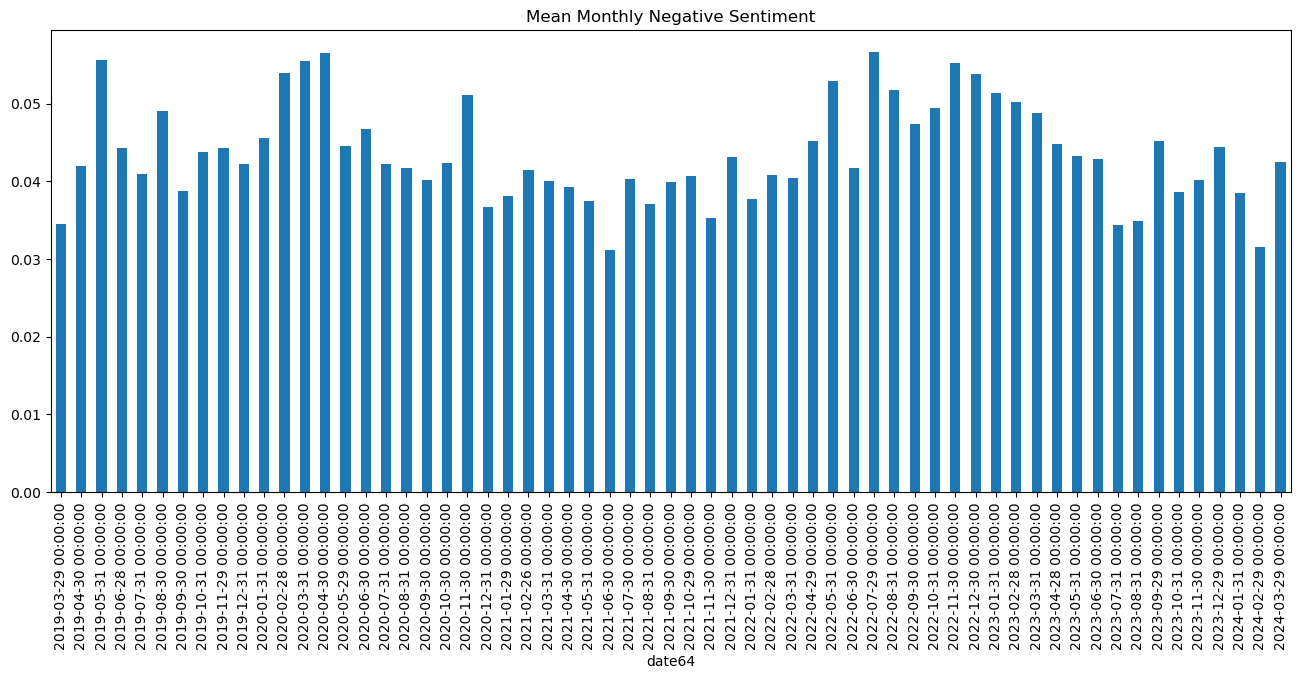

In [680]:
#Graph Median Monthly Negative Sentiment
title = 'Mean Monthly Negative Sentiment'
news_19_24_df_dateindex['sentiment_neg'].resample(rule='BME').mean().plot.bar(figsize=(16,6), title=title,color='#1f77b4')

<Axes: title={'center': 'Mean Monthly Neutral Sentiment'}, xlabel='date64'>

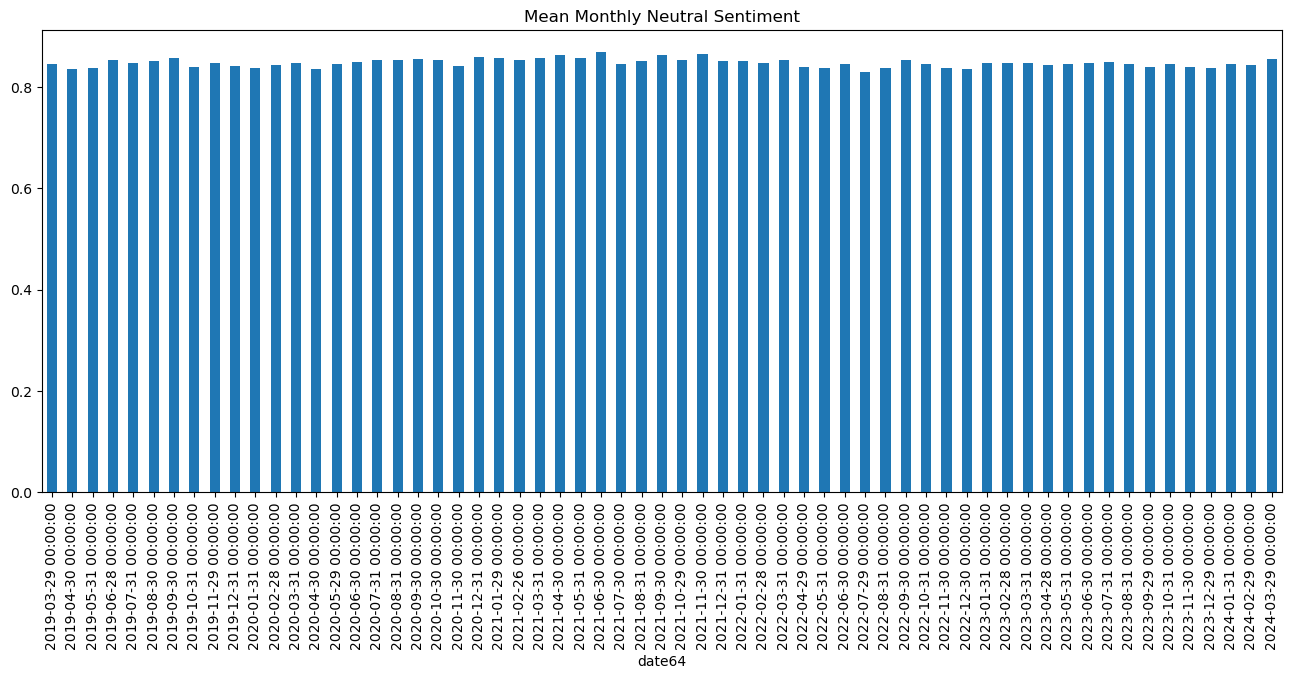

In [681]:
#Graph Median Monthly Neutral Sentiment
title = 'Mean Monthly Neutral Sentiment'
news_19_24_df_dateindex['sentiment_neu'].resample(rule='BME').mean().plot.bar(figsize=(16,6), title=title,color='#1f77b4')

<Axes: title={'center': 'Mean Monthly Positive Sentiment'}, xlabel='date64'>

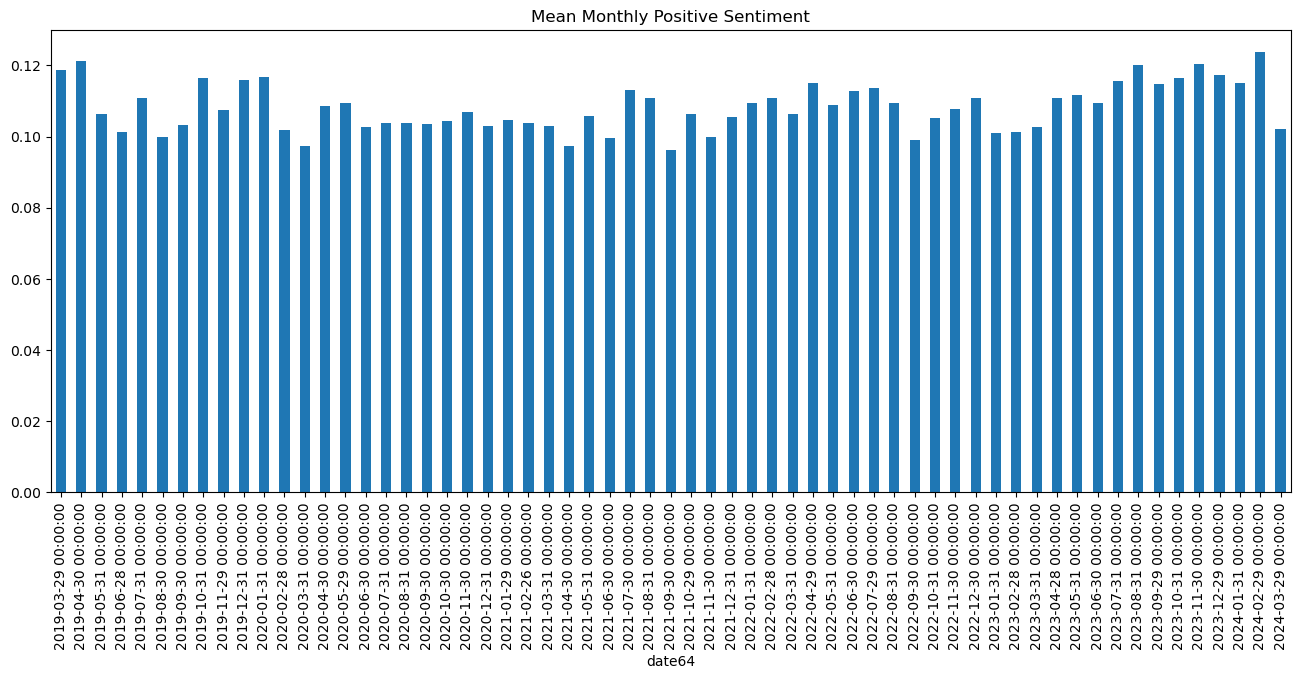

In [682]:
#Graph Median Monthly Positive Sentiment
title = 'Mean Monthly Positive Sentiment'
news_19_24_df_dateindex['sentiment_pos'].resample(rule='BME').mean().plot.bar(figsize=(16,6), title=title,color='#1f77b4')

<Axes: title={'center': 'Mean Monthly Positive Sentiment'}, xlabel='date64'>

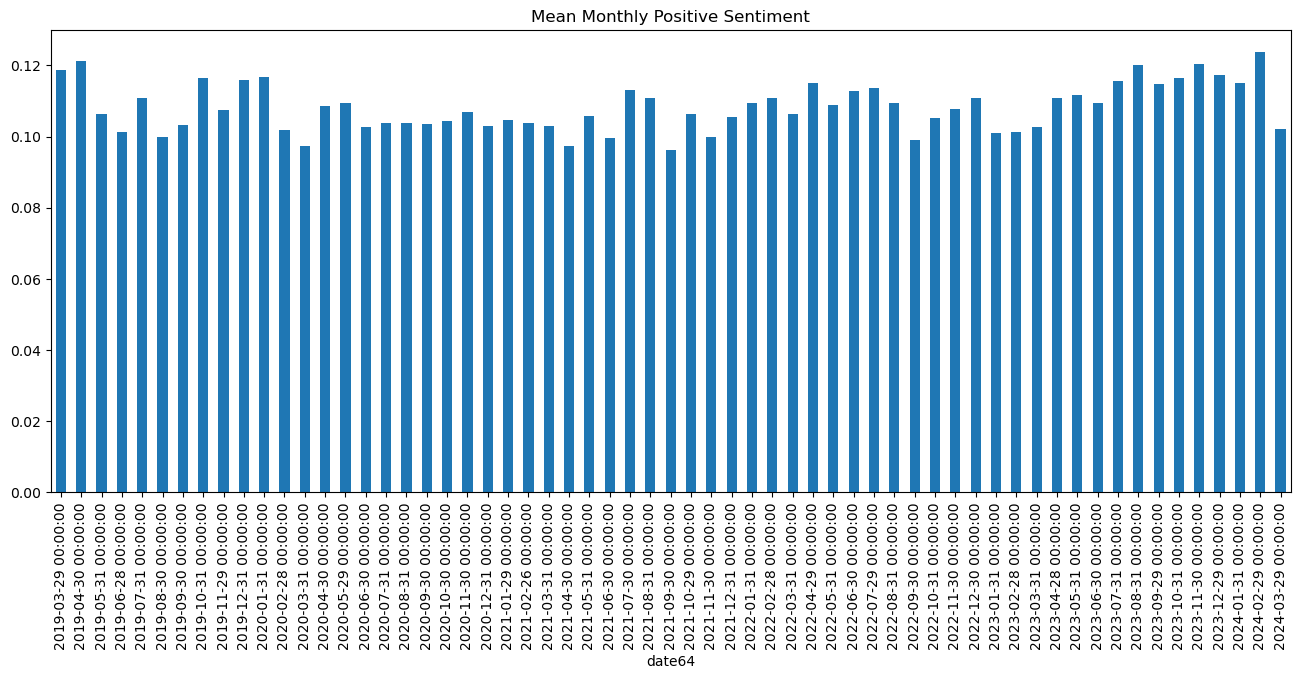

In [683]:
#Graph Median Monthly Positive Sentiment
title = 'Mean Monthly Positive Sentiment'
news_19_24_df_dateindex['sentiment_pos'].resample(rule='BME').mean().plot.bar(figsize=(16,6), title=title,color='#1f77b4')

<Axes: title={'center': 'Mean Monthly Total Sentiment'}, xlabel='date64'>

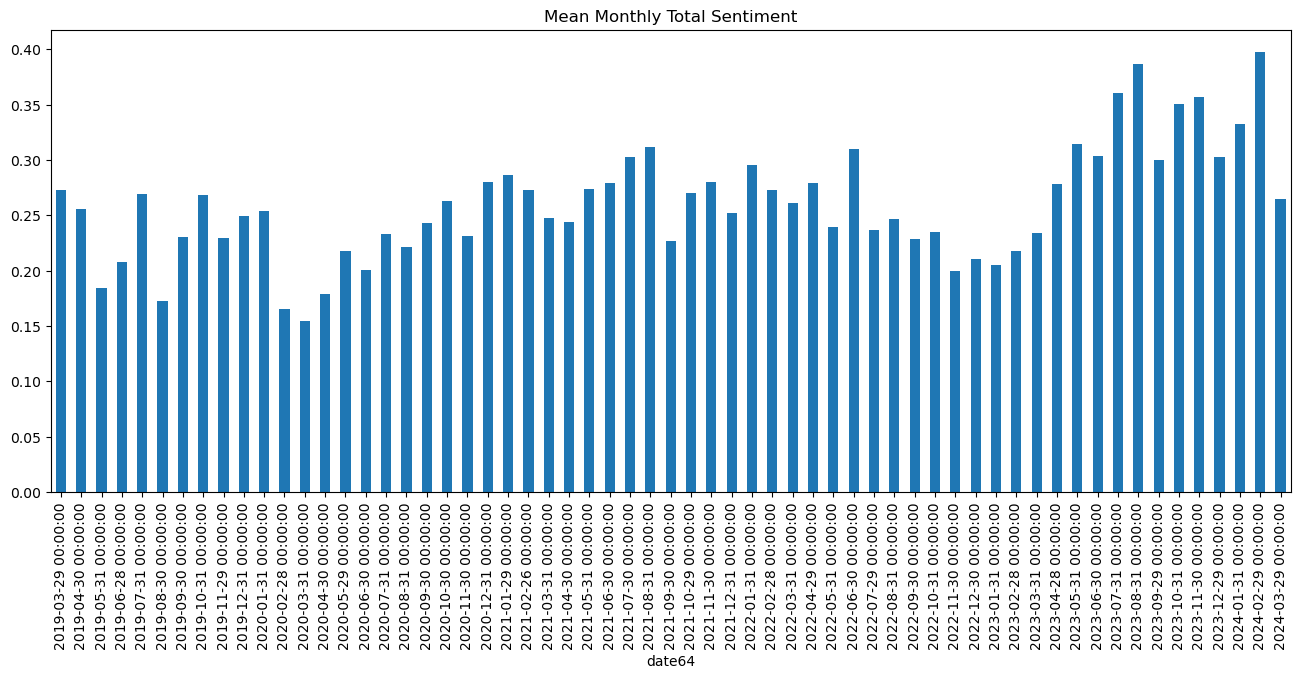

In [684]:
#Graph Mean Monthly Total Sentiment
title = 'Mean Monthly Total Sentiment'
news_19_24_df_dateindex['sentiment_tot'].resample(rule='BME').mean().plot.bar(figsize=(16,6), title=title,color='#1f77b4')

<Axes: title={'center': 'Median Monthly Total Sentiment'}, xlabel='date64'>

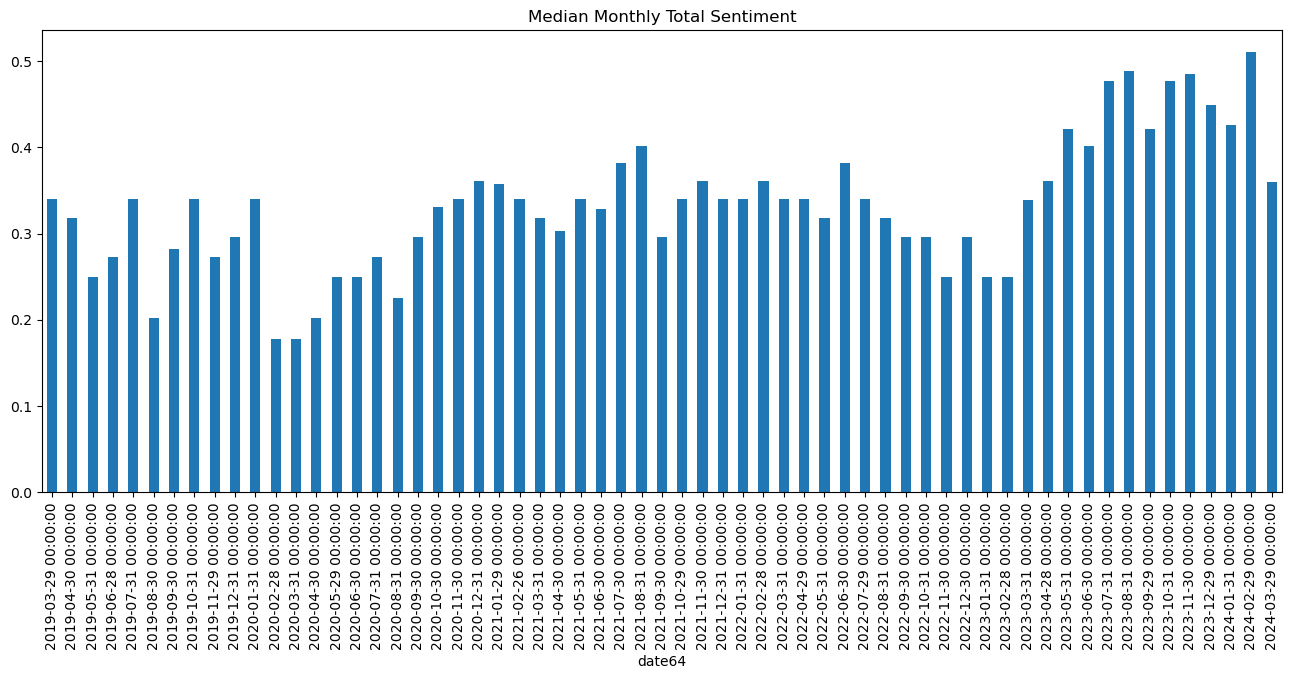

In [685]:
#Graph Median Monthly Total Sentiment
title = 'Median Monthly Total Sentiment'
news_19_24_df_dateindex['sentiment_tot'].resample(rule='BME').median().plot.bar(figsize=(16,6), title=title,color='#1f77b4')

In [686]:
#What is the most recent publication date among the sources?
news_19_24_df.date64.max()


Timestamp('2024-03-15 00:00:00')

In [687]:
#What is the oldest publication date among the sources?
news_19_24_df.date64.min()

Timestamp('2019-03-15 00:00:00')

In [688]:
#Describe the numerical values of the dataset
news_19_24_df.describe()

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot,date64
count,63704.000000,63704.000000,63704.000000,63704.000000,63704
mean,0.043558,0.848167,0.108273,0.262408,2021-10-16 06:26:13.276402944
min,0.000000,0.147000,0.000000,-0.987000,2019-03-15 00:00:00
25%,0.000000,0.782000,0.039000,0.000000,2020-07-15 00:00:00
50%,0.000000,0.857000,0.095000,0.340000,2021-10-14 00:00:00
75%,0.073000,0.924000,0.163000,0.680800,2023-02-02 00:00:00
max,0.702000,1.000000,0.733000,0.995300,2024-03-15 00:00:00
std,0.064948,0.103398,0.090847,0.484216,NaN


Note that the standard deviations for the negative, position, and total sentiment scores are relatively large relative to the means. The scoring process tends to be more stable when it comes to neutral sentiment. The standard deviation is much smaller than the mean. This may suggest some opportunities to improve the sentiment scores.

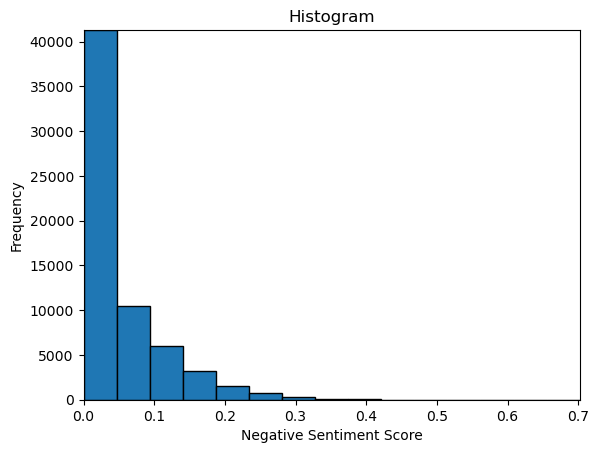

In [689]:
#Histogram for Negative Sentiment Score#Histogram for Negative Sentiment Score
news_19_24_df['sentiment_neg'].plot.hist(title='Histogram', xlabel='Negative Sentiment Score', grid=False, bins=15, edgecolor='k').autoscale(enable=True, tight=True)

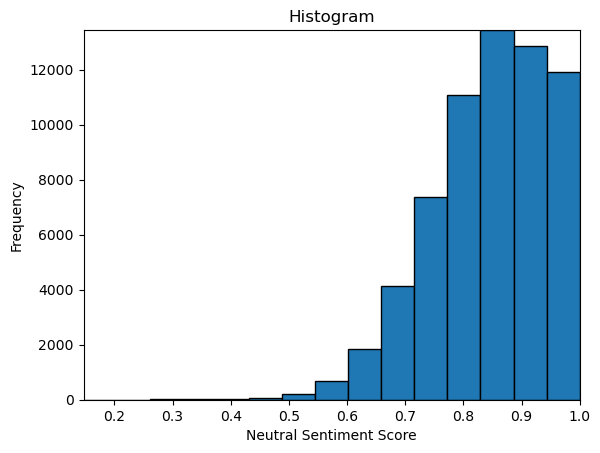

In [690]:
#Histogram for Neutral Sentiment Score
news_19_24_df['sentiment_neu'].plot.hist(title='Histogram', xlabel='Neutral Sentiment Score', grid=False, bins=15, edgecolor='k').autoscale(enable=True, tight=True)

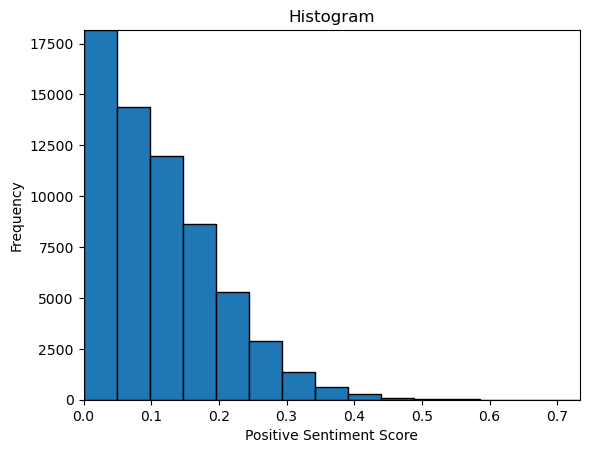

In [691]:
#Histogram for Postive Sentiment Score
news_19_24_df['sentiment_pos'].plot.hist(title='Histogram', xlabel='Positive Sentiment Score', grid=False, bins=15, edgecolor='k').autoscale(enable=True, tight=True)

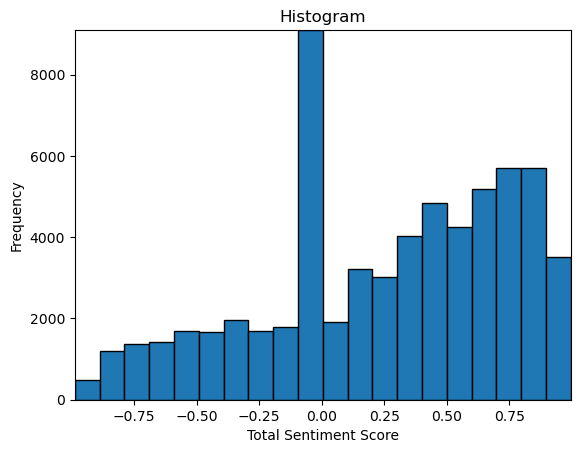

In [692]:
#Histogram for Total Sentiment Score
news_19_24_df['sentiment_tot'].plot.hist(title='Histogram', xlabel='Total Sentiment Score', grid=False, bins=20, edgecolor='k').autoscale(enable=True, tight=True)

<Axes: >

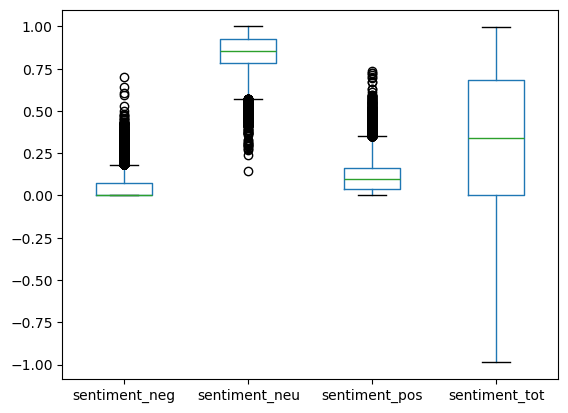

In [693]:
#View box plots of sentiment scores
sent_scores_df = news_19_24_df[['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_tot']]
sent_scores_df.boxplot(grid=False)

array([[<Axes: title={'center': 'sentiment_neg'}, xlabel='[Sector]'>,
        <Axes: title={'center': 'sentiment_neu'}, xlabel='[Sector]'>],
       [<Axes: title={'center': 'sentiment_pos'}, xlabel='[Sector]'>,
        <Axes: title={'center': 'sentiment_tot'}, xlabel='[Sector]'>]],
      dtype=object)

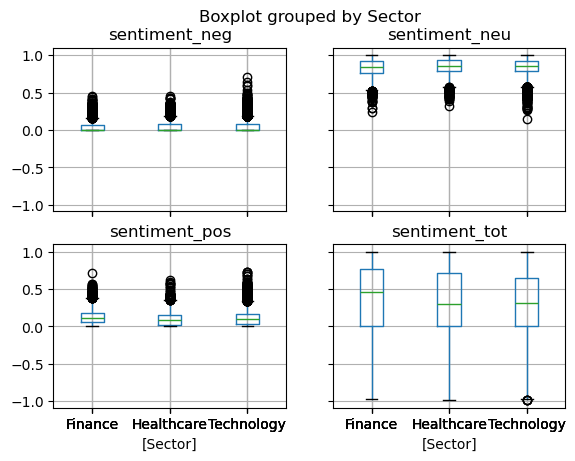

In [694]:
#How do sentiment scores vary by sector?
news_19_24_df.boxplot(by='Sector')
#Most scores are common across sectors. The median for total sentiment is higher for the finance sector. 
#Outliers are prominent in the subscores.

In [695]:
#Explore the data by sector more closely
#Create a dataframe with duplicate columns to generate pivot tables.
sector_df = news_19_24_df.loc[:, ['Sector', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_tot']]
sector_df['sentiment_neg1'] = sector_df.loc[: ,'sentiment_neg']
sector_df['sentiment_neg2'] = sector_df.loc[: ,'sentiment_neg']
sector_df['sentiment_neu1'] = sector_df.loc[: ,'sentiment_neu']
sector_df['sentiment_neu2'] = sector_df.loc[: ,'sentiment_neu']
sector_df['sentiment_pos1'] = sector_df.loc[: ,'sentiment_pos']
sector_df['sentiment_pos2'] = sector_df.loc[: ,'sentiment_pos']
sector_df['sentiment_tot1'] = sector_df.loc[: ,'sentiment_tot']
sector_df['sentiment_tot2'] = sector_df.loc[: ,'sentiment_tot']
sector_df.head()

                                        

,Sector,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot,sentiment_neg1,sentiment_neg2,sentiment_neu1,sentiment_neu2,sentiment_pos1,sentiment_pos2,sentiment_tot1,sentiment_tot2
0,Finance,0.000,0.931,0.069,0.2500,0.000,0.000,0.931,0.931,0.069,0.069,0.2500,0.2500
1,Technology,0.000,0.748,0.252,0.5248,0.000,0.000,0.748,0.748,0.252,0.252,0.5248,0.5248
2,Finance,0.060,0.741,0.199,0.7269,0.060,0.060,0.741,0.741,0.199,0.199,0.7269,0.7269
3,Finance,0.104,0.896,0.000,-0.5367,0.104,0.104,0.896,0.896,0.000,0.000,-0.5367,-0.5367
4,Technology,0.085,0.915,0.000,-0.4201,0.085,0.085,0.915,0.915,0.000,0.000,-0.4201,-0.4201


In [696]:
#View pivot table by sector - negative sentiment
pivot_sector_neg = pd.pivot_table(
    data=sector_df,
    index='Sector',
    aggfunc={'sentiment_neg': 'mean', 'sentiment_neg1': 'std', 'sentiment_neg2': 'median'}
)
pivot_sector_neg.columns = ['sentiment_neg_mean', 'sentiment_neg_sd', 'sentiment_neg_mdn']
print(pivot_sector_neg)

            sentiment_neg_mean  sentiment_neg_sd  sentiment_neg_mdn
Sector                                                             
Finance               0.040172          0.064322                0.0
Healthcare            0.046309          0.066034                0.0
Technology            0.043744          0.064853                0.0


In [697]:
#View pivot table by sector - neutral sentiment
pivot_sector_neu = pd.pivot_table(
    data=sector_df,
    index='Sector',
    aggfunc={'sentiment_neu': 'mean', 'sentiment_neu1': 'std', 'sentiment_neu2': 'median'}
)
pivot_sector_neu.columns = ['sentiment_neu_mean', 'sentiment_neu_sd', 'sentiment_neu_mdn']
print(pivot_sector_neu)

            sentiment_neu_mean  sentiment_neu_sd  sentiment_neu_mdn
Sector                                                             
Finance               0.835520          0.109803              0.842
Healthcare            0.853642          0.104175              0.861
Technology            0.849701          0.101762              0.859


In [698]:
#View pivot table by sector - positive sentiment
pivot_sector_pos = pd.pivot_table(
    data=sector_df,
    index='Sector',
    aggfunc={'sentiment_pos': 'mean', 'sentiment_pos1': 'std', 'sentiment_pos2': 'median'}
)
pivot_sector_pos.columns = ['sentiment_pos_mean', 'sentiment_pos_sd', 'sentiment_pos_mdn']
print(pivot_sector_pos)

            sentiment_pos_mean  sentiment_pos_sd  sentiment_pos_mdn
Sector                                                             
Finance               0.124306          0.095379              0.114
Healthcare            0.100053          0.088890              0.087
Technology            0.106552          0.089908              0.093


In [699]:
#View pivot table by sector - total sentiment
pivot_sector_tot = pd.pivot_table(
    data=sector_df,
    index='Sector',
    aggfunc={'sentiment_tot': 'mean', 'sentiment_tot1': 'std', 'sentiment_tot2': 'median'}
)
pivot_sector_tot.columns = ['sentiment_tot_mean', 'sentiment_tot_sd', 'sentiment_tot_md']
print(pivot_sector_tot)

            sentiment_tot_mean  sentiment_tot_sd  sentiment_tot_md
Sector                                                            
Finance               0.361398          0.477078            0.4588
Healthcare            0.241603          0.520063            0.2960
Technology            0.246548          0.476745            0.3182


In [700]:
sector_dummies = (pd.get_dummies(news_19_24_df['Sector']))
sector_dummies.head()
#sector_dummies.tail()
#sector_dummies.info()


,Finance,Healthcare,Technology
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


In [701]:
#Which tickers were in the news the most during this period?
ticker_count = news_19_24_df['Ticker'].value_counts()
ticker_count

Ticker
AMZN     14029
AAPL     12991
GOOGL     8316
MSFT      5934
NVDA      5179
JPM       2508
JNJ       2213
WFC       1810
BAC       1757
MRK       1702
LLY       1693
V         1559
MA        1512
ABBV      1452
UNH       1049
Name: count, dtype: int64

In [702]:
#Summarize the tickers during the period.
ticker_count.describe()
#Median number of articles is 1810 over the period.

count       15.000000
mean      4246.933333
std       4288.368812
min       1049.000000
25%       1626.000000
50%       1810.000000
75%       5556.500000
max      14029.000000
Name: count, dtype: float64

In [703]:
#Which media outlets were most represented in our dataset?
source_count = news_19_24_df['Source'].value_counts()
source_count

Source
The Motley Fool              7411
Zacks Investment Research    5026
Seeking Alpha                4873
CNBC                         4477
Reuters                      4268
Market Watch                 3445
InvestorPlace                3061
Benzinga                     2885
Business Wire                2807
TechCrunch                   2524
Forbes                       2224
CNET                         1606
PYMNTS                       1469
Business Insider             1467
PRNewsWire                   1414
GeekWire                     1220
Investors Business Daily     1188
New York Post                1174
Barrons                      1003
Proactive Investors           965
CNN Business                  872
24/7 Wall Street              765
TechXplore                    713
Invezz                        712
The Guardian                  650
Investopedia                  626
NYTimes                       546
WSJ                           460
Fox Business                  420
GuruFoc

In [704]:
#Summarize the sources during the period.
source_count.describe()
#Median number of articles is 411 over the period.

count      59.000000
mean     1079.728814
std      1564.655088
min         1.000000
25%        51.000000
50%       411.000000
75%      1317.000000
max      7411.000000
Name: count, dtype: float64

In [705]:
#What is the representation of the Sources by Sector?
sources_sector_df = news_19_24_df['Source'].groupby(news_19_24_df['Sector']).value_counts(normalize=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (sources_sector_df)
#Click "scrollable element" or "text editor" at the bottom of the cell to see all values.


Sector      Source                   
Finance     Zacks Investment Research    0.152526
            Seeking Alpha                0.110212
            Business Wire                0.105839
            The Motley Fool              0.085830
            Reuters                      0.084190
            Market Watch                 0.052045
            PYMNTS                       0.051389
            PRNewsWire                   0.046687
            CNBC                         0.041220
            InvestorPlace                0.039689
            Forbes                       0.029521
            Benzinga                     0.029193
            Business Insider             0.018369
            New York Post                0.016401
            Invezz                       0.013449
            Investors Business Daily     0.011152
            GuruFocus                    0.010715
            Investopedia                 0.010496
            CNN Business                 0.010168
            

In [706]:
#Create new df and reset index to date
fin_19_24_df = news_19_24_df_dateindex[news_19_24_df_dateindex['Sector']=='Finance'].copy(deep=True)
#fin_19_24_df.info()
fin_19_24_df.head()


,Date & Time,Date,Time,Ticker,Sector,Source,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot,Headline,Text,URL
date64,,,,,,,,,,,,,
2019-03-15,2019-03-15 10:46:42+00:00,2019-03-15,10:46:42,WFC,Finance,The Motley Fool,0.000,0.931,0.069,0.2500,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,https://www.fool.com/investing/2019/03/14/did-...
2019-03-15,2019-03-15 11:33:00+00:00,2019-03-15,11:33:00,MA,Finance,Forbes,0.060,0.741,0.199,0.7269,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,https://www.forbes.com/sites/greatspeculations...
2019-03-15,2019-03-15 11:52:45+00:00,2019-03-15,11:52:45,BAC,Finance,Benzinga,0.104,0.896,0.000,-0.5367,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",https://feeds.benzinga.com/~r/benzinga/~3/Fwtd...
2019-03-15,2019-03-15 16:36:05+00:00,2019-03-15,16:36:05,JPM,Finance,The Motley Fool,0.000,0.932,0.068,0.2263,Why Warren Buffett Thinks JPMorgan's Stock Cou...,The billionaire investor recently revealed his...,https://www.fool.com/investing/2019/03/15/why-...
2019-03-18,2019-03-18 14:32:13+00:00,2019-03-18,14:32:13,JPM,Finance,CNBC,0.039,0.863,0.098,0.4824,JP Morgan pledges $350 million to help people ...,J.P. Morgan CEO Jamie Dimon has voiced concern...,https://www.cnbc.com/2019/03/18/jp-morgan-pled...


<Axes: xlabel='date64'>

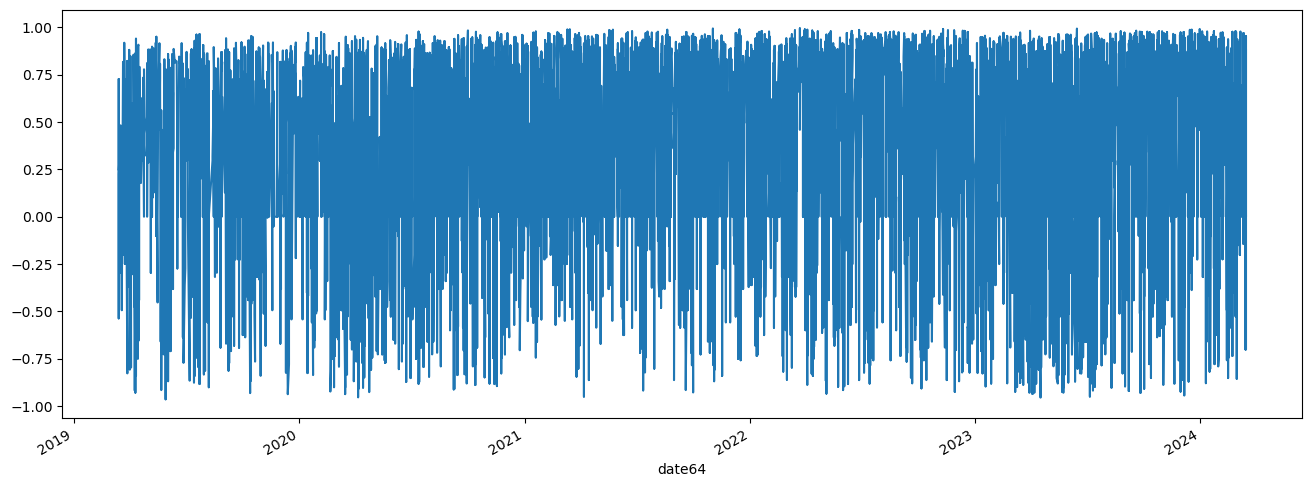

In [707]:
fin_19_24_df['sentiment_tot'].plot(figsize = (16,6))

In [708]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [709]:
#Hodrick Prescott filter
fin_cycle, fin_trend = hpfilter(fin_19_24_df['sentiment_tot'], lamb=115090527490.23438)

In [710]:
#Compute H-P lambda value for daily data. Inserted above.
1660*((365/4)**4)
#See https://www.stata.com/manuals/tstsfilterhp.pdf for documentation

115090527490.23438

In [711]:
type(fin_cycle)

pandas.core.series.Series

In [712]:
fin_19_24_df['trend'] = fin_trend
fin_19_24_df['cycle'] = fin_cycle

In [713]:
fin_19_24_df.head()

,Date & Time,Date,Time,Ticker,Sector,Source,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot,Headline,Text,URL,trend,cycle
date64,,,,,,,,,,,,,,,
2019-03-15,2019-03-15 10:46:42+00:00,2019-03-15,10:46:42,WFC,Finance,The Motley Fool,0.000,0.931,0.069,0.2500,Did Wells Fargo CEO Tim Sloan Earn His $1 Mill...,We learned this week that the scandal-plagued ...,https://www.fool.com/investing/2019/03/14/did-...,0.332727,-0.082727
2019-03-15,2019-03-15 11:33:00+00:00,2019-03-15,11:33:00,MA,Finance,Forbes,0.060,0.741,0.199,0.7269,A Closer Look At Mastercard's Key Value Drivers,Mastercard has consistently beat street estima...,https://www.forbes.com/sites/greatspeculations...,0.332673,0.394227
2019-03-15,2019-03-15 11:52:45+00:00,2019-03-15,11:52:45,BAC,Finance,Benzinga,0.104,0.896,0.000,-0.5367,Jim Cramer Gives His Opinion On Bank Of Americ...,"On CNBC's ""Mad Money Lightning Round"", Jim Cra...",https://feeds.benzinga.com/~r/benzinga/~3/Fwtd...,0.332618,-0.869318
2019-03-15,2019-03-15 16:36:05+00:00,2019-03-15,16:36:05,JPM,Finance,The Motley Fool,0.000,0.932,0.068,0.2263,Why Warren Buffett Thinks JPMorgan's Stock Cou...,The billionaire investor recently revealed his...,https://www.fool.com/investing/2019/03/15/why-...,0.332564,-0.106264
2019-03-18,2019-03-18 14:32:13+00:00,2019-03-18,14:32:13,JPM,Finance,CNBC,0.039,0.863,0.098,0.4824,JP Morgan pledges $350 million to help people ...,J.P. Morgan CEO Jamie Dimon has voiced concern...,https://www.cnbc.com/2019/03/18/jp-morgan-pled...,0.332509,0.149891


<Axes: xlabel='date64'>

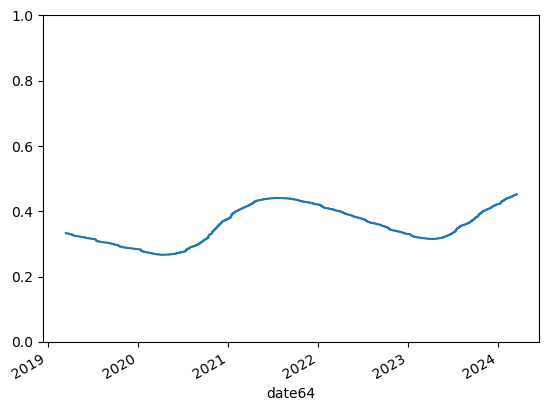

In [714]:
fin_19_24_df.trend.plot(ylim=[0,1])

In [715]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [716]:
fin_result = seasonal_decompose(fin_19_24_df['sentiment_tot'], model='additive', period=1)

In [717]:
fin_result.resid


date64
2019-03-15    0.0
2019-03-15    0.0
2019-03-15    0.0
2019-03-15    0.0
2019-03-18    0.0
             ... 
2024-03-15    0.0
2024-03-15    0.0
2024-03-15    0.0
2024-03-15    0.0
2024-03-15    0.0
Name: resid, Length: 9146, dtype: float64

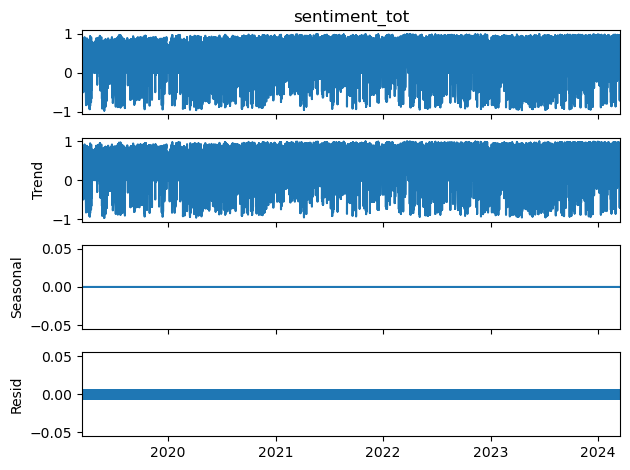

In [718]:
fin_result.plot();

In [719]:
import matplotlib.pyplot as plt
import seaborn as sns

In [720]:
#fin_19_24_df = news_19_24_df_dateindex[news_19_24_df_dateindex['Sector']=='Finance'].copy(deep=True)
news_sent_df = news_19_24_df[['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_tot']].copy(deep=True)
news_sent_df.head()

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot
0,0.000,0.931,0.069,0.2500
1,0.000,0.748,0.252,0.5248
2,0.060,0.741,0.199,0.7269
3,0.104,0.896,0.000,-0.5367
4,0.085,0.915,0.000,-0.4201


In [721]:
from sklearn.preprocessing import StandardScaler

In [722]:
scaler = StandardScaler()

In [723]:
scaler.fit(news_sent_df)

StandardScaler()

In [724]:
#Scale data
scaled_news_sent_df = scaler.transform(news_sent_df)

In [725]:
#PCA
from sklearn.decomposition import PCA

In [726]:
pca = PCA(n_components=2)

In [727]:
pca.fit(scaled_news_sent_df)

PCA(n_components=2)

In [728]:
x_pca = pca.transform(scaled_news_sent_df)

In [729]:
scaled_news_sent_df.shape

(63704, 4)

In [730]:
x_pca.shape

(63704, 2)

Text(0, 0.5, 'Second Principal Component')

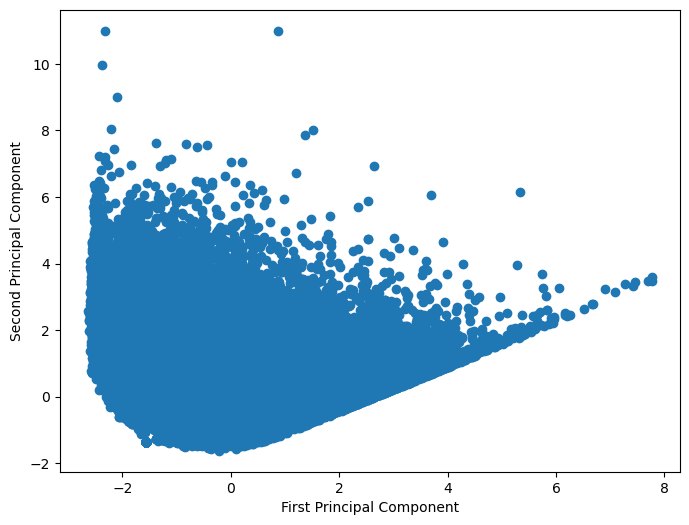

In [731]:
plt.figure(figsize=(8,6))
#plt.scatter(x_pca[:,0], x_pca[:,1], c=news_19_24_df['Sector'], cmap='plasma')
plt.scatter(x_pca[:,0], x_pca[:,1])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [732]:
pca.components_

array([[-0.23278391, -0.42556246,  0.65077827,  0.58411976],
       [ 0.70913006, -0.59437295,  0.16951772, -0.33929205]])

In [733]:
df_comp = pd.DataFrame(pca.components_, columns=[['sentiment_neg', 'sentiment_neu','sentiment_pos','sentiment_tot',]])

In [734]:
df_comp

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_tot
0,-0.232784,-0.425562,0.650778,0.584120
1,0.709130,-0.594373,0.169518,-0.339292


<Axes: xlabel='None'>

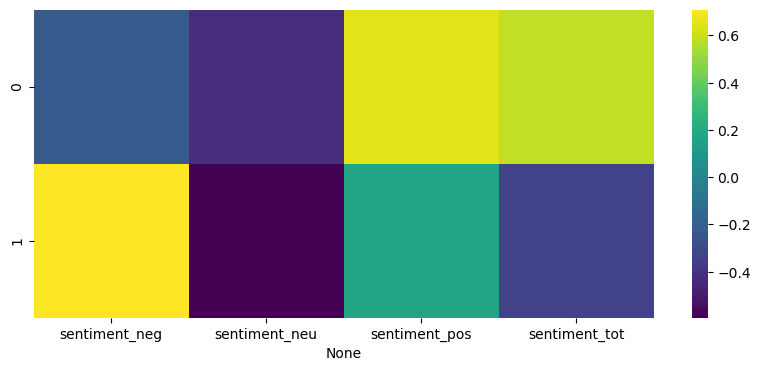

In [735]:
plt.figure(figsize=(10,4))
sns.heatmap(df_comp, cmap='viridis')

In [736]:
#Eigenvalues
pca.explained_variance_

array([2.20178838, 1.7008311 ])

In [737]:
#Percentage of variance explained by each component
pca.explained_variance_ratio_

array([0.55043845, 0.4252011 ])